# Graph Depth-First Search With Recursion

We've done depth-first search previously using an iterative approach (i.e., using a loop). In this notebook, we'll show how to implement a recursive soluton.

The basic idea is to select a node and explore all the possible paths from that node, and to apply this recursively to each node we are exploring.

You can see some helpful illustrations with various combinations here: https://www.cs.usfca.edu/~galles/visualization/DFS.html

In [1]:
# For this exercise we will be using an Adjacency List representation to store the graph.

# Class Node representation.
class Node:
    def __init__(self,val):
        self.value = val
        self.children = []
        
    def add_child(self,new_node):
        self.children.append(new_node)
    
    def remove_child(self,del_node):
        if del_node in self.children:
            self.children.remove(del_node)

class Graph():
    def __init__(self,node_list):
        self.nodes = node_list
        
    def add_edge(self,node1,node2):
        if(node1 in self.nodes and node2 in self.nodes):
            node1.add_child(node2)
            node2.add_child(node1)
            
    def remove_edge(self,node1,node2):
        if(node1 in self.nodes and node2 in self.nodes):
            node1.remove_child(node2)
            node2.remove_child(node1)

### Initializing Graph with an example

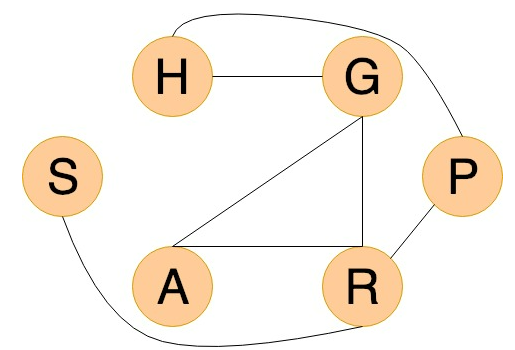
Consider the above graph structure. The following code initializes all the edges according to the above structure.

In [2]:
# Creating a graph as above.
nodeG = Node('G')
nodeR = Node('R')
nodeA = Node('A')
nodeP = Node('P')
nodeH = Node('H')
nodeS = Node('S')

graph1 = Graph([nodeS,nodeH,nodeG,nodeP,nodeR,nodeA] ) 

graph1.add_edge(nodeG,nodeR)
graph1.add_edge(nodeA,nodeR)
graph1.add_edge(nodeA,nodeG)
graph1.add_edge(nodeR,nodeP)
graph1.add_edge(nodeH,nodeG)
graph1.add_edge(nodeH,nodeP)
graph1.add_edge(nodeS,nodeR)

In [3]:
# To verify that the graph is created accurately.
# Let's just print all the parent nodes and child nodes.
for each in graph1.nodes:
    print('parent node = ',each.value,end='\nchildren\n')
    for each in each.children:
        print(each.value,end=' ')
    print('\n')

parent node =  S
children
R 

parent node =  H
children
G P 

parent node =  G
children
R A H 

parent node =  P
children
R H 

parent node =  R
children
G A P S 

parent node =  A
children
R G 



In [4]:
for node in graph1.nodes:
    print(node.value, [x.value for x in node.children])

S ['R']
H ['G', 'P']
G ['R', 'A', 'H']
P ['R', 'H']
R ['G', 'A', 'P', 'S']
A ['R', 'G']


### Sample input and output 

The output would vary based on the implementation of your algorithm, the order in which children are stored within the adjacency list.

### DFS using recursion
Now that we have our example graph initialized, we are ready to do the actual depth-first search. Here's what that looks like:

In [21]:
'''TO DO'''
def helper(start_node,search_value,checked_set):
    checked_set.add(start_node)
#     print([x.value for x in checked_set])
    if start_node.value == search_value:
        return start_node
    else:
        for node in start_node.children:
            if not node in checked_set:
                cur = helper(node,search_value,checked_set)
                if cur:
                    return cur
    return None

def dfs_recursion_start(start_node, search_value):
    checked_set = set()
    return helper(start_node,search_value,checked_set)

In [22]:
assert nodeA == dfs_recursion_start(nodeG, 'A')
assert nodeA == dfs_recursion_start(nodeS, 'A')
assert nodeS == dfs_recursion_start(nodeP, 'S')
assert nodeR == dfs_recursion_start(nodeH, 'R')

##### Standard Solution
```python
# Solution
def dfs_recursion_start(start_node, search_value):
    visited = set()               # Set to keep track of visited nodes.
    return dfs_recursion(start_node, visited, search_value)

# Recursive function
def dfs_recursion(node, visited, search_value):
    if node.value == search_value:
        found = True              # Don't search in other branches, if found = True
        return node
    
    visited.add(node)
    found = False
    result = None

    # Conditional recurse on each neighbour
    for child in node.children:
        if (child not in visited):
                result = dfs_recursion(child, visited, search_value)
                
                # Once the match is found, no more recurse 
                if found:
                    break
    return result
```